In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, SVG
import rdkit.Chem as Chem
from rdkit.Chem import PandasTools, Descriptors
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.AtomPairs import Pairs
import numpy as np

C:\Users\Nex\AppData\Local\Temp\ipykernel_20072\821525750.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, SVG


In [2]:
''' # to make it OS independent, like when using mac, linux.
base_path = os.path.join(os.path.expanduser("~"),
                         "documents", "Jupyter Files", "Cloud Point determination")
print(base_path)
'''
base_path = (os.path.expanduser("~") + "\\Documents\\Jupyter Files\\Cloud Point determination")
os.makedirs(base_path, exist_ok=True)
df = pd.read_csv(os.path.join(base_path, "cloud_points_data.csv"), sep=";", decimal=",", encoding="utf8")


number or different consstitutional/repeating units: 49


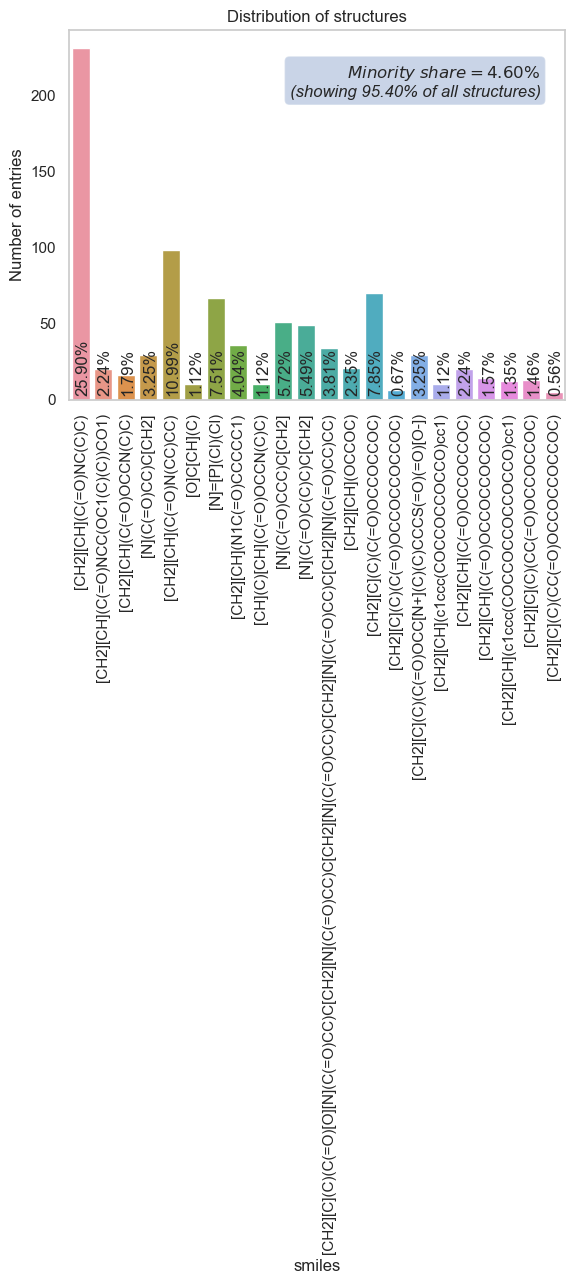

In [8]:
sns.set(color_codes=True)
sns.set_style("whitegrid")
c = df["SMILES_repeating_unitA"].value_counts(normalize=True)
print("number or different consstitutional/repeating units: {}".format(len(c)))
s2have = [s for s,p in c.to_dict().items() if p > 0.005]
#took only the ones with more than 1% share into s2have dictionary
#compared that now with the whole

figure = sns.countplot(x=df[df["SMILES_repeating_unitA"].isin(s2have)]["SMILES_repeating_unitA"])
plt.title("Distribution of structures")
plt.ylabel("Number of entries")

plt.xlabel("smiles")
plt.xticks(rotation=90)
figure.grid(False)
minority = 0
share = 0
share_sum = 0
for p in figure.patches:
    share = 100*p.get_height()/df.shape[0]
    share_sum += share
    if share >= 0:
        figure.annotate(
            "{:.2f}%".format(share),
            (p.get_x()+p.get_width()/1.6,2.5),# x, y text position an tiles
            rotation = 90, # text rotation
            ha='center',# horizontal anchor of text
            va='bottom'
        )
    else:
        minority += share

#creating a string for a Textbox
text_str = "\n".join((
    "$Minority$ $share = %.2f\%%$" %(minority + 100-share_sum),
    "(showing %.2f%% of all structures)" %share_sum
    ))
# creating a rectangle for fast alignment to the ends of the drawing
figure.text(0.95, 0.91, s=text_str, transform=figure.transAxes, style="italic",
            horizontalalignment="right", verticalalignment="top",
            bbox={
            "boxstyle":"round", "alpha":0.3
            }
        )

plt.savefig(fname=os.path.join(base_path, "Overlook of SMILES"), dpi=600, bbox_inches="tight")
plt.show(figure)

Text(5.960000000000001, 0.5, '$T_{CP}$ [°C]')

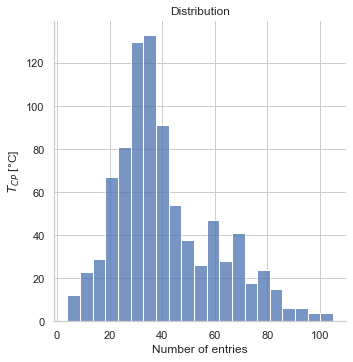

In [4]:
figure = sns.displot(df["cloud_point"])
plt.title("Distribution")
plt.xlabel("Number of entries")
plt.ylabel("$T_{CP}$ [°C]")
#plt.xticks(rotation=90)
#figure.set(xlabel="No.", ylabel="T[°C]", title= "temps")

In [5]:
df_count = df
df_count2 = df
df_count = (df_count.groupby("def_type") ["reference"].nunique()).reset_index().rename(columns={"reference":"References"})
df_count2 = df_count2.groupby("def_type")["reference"].count().reset_index().rename(columns={"reference":"entries"})
print(df_count, df_count2, sep="\n \n")

  def_type  References
0     0,05           1
1      0,1           5
2      0,2           1
3        A          12
4        B           2
5        C          13
6      DSC           2
 
  def_type  entries
0     0,05       16
1      0,1       70
2      0,2        4
3        A      229
4        B       19
5        C      490
6      DSC        7


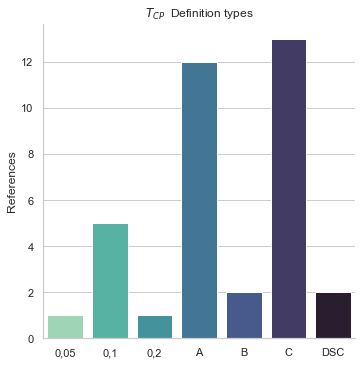

In [6]:
sns.catplot(data= df_count, kind="bar", x=df_count["def_type"], y=df_count["References"], palette="mako_r")
plt.xlabel(None)
plt.title("$T_{CP}$  Definition types")
plt.savefig(fname=os.path.join(base_path, "T_CP Def types"), dpi=600, bbox_inches="tight")

751 cloud_point and 751 Mn used
from 892 overall entrys 877 cloudpoints and 854 masses were used 
which after exclusion of those masses over 45000 g/mol gave 751 points to plot


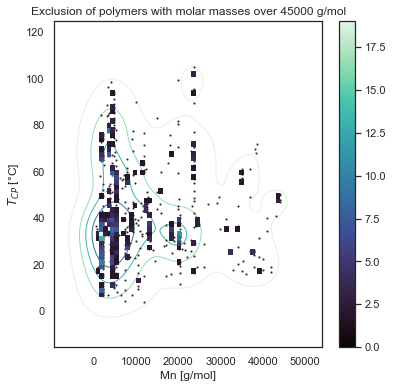

In [7]:
sns.set_theme(style="white", palette=None)
df2 = df[["cloud_point", "Mn"]]
df2 = df2.dropna()
smaller_Mn = df2[df2["Mn"] > 45000].index
df2.drop(smaller_Mn, inplace=True)
y, x= (df2["cloud_point"], df2["Mn"])
print("{} {} and {} {} used".format(len(y), y.name, len(x), x.name))

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1, zorder=0, shade=False, cmap="mako_r")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako", cbar=True)
plt.xlabel("Mn [g/mol]")
plt.ylabel("$T_{CP}$ [°C]")

if x.name == "Mn":
    plt.title("Exclusion of polymers with molar masses over 45000 g/mol")
    print("from {} overall entrys {} cloudpoints and {} masses were used \n"
          "which after exclusion of those masses over 45000 g/mol gave {} points to plot"
          .format(len(df), len(df["cloud_point"].dropna()) , len( df["Mn"].dropna()), len(x)))
plt.savefig(fname=os.path.join(base_path, "{} over {}".format(y.name, x.name)), dpi=600, bbox_inches="tight")

100  [N](C(=O)CC)C[CH2]


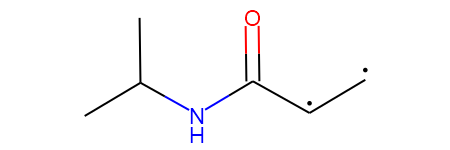

200  [CH2][CH](C(=O)NC(C)C)
300  [CH2][CH](C(=O)NC(C)C)
400  [CH2][CH](N1C(=O)CCCCC1)
500  [N](C(=O)CCC)C[CH2]
600  [CH2][C](C)(C(=O)[O][N](C(=O)CC)C[CH2][N](C(=O)CC)C[CH2][N](C(=O)CC)C[CH2][N](C(=O)CC)C[CH2][N](C(=O)CC)CC)
700  [CH2][C](C)(C(=O)OCC[N+](C)(C)CCCS(=O)(=O)[O-])
800  [CH2][CH](C(=O)NC(C)C)


In [8]:
from rdkit.Chem import Draw

Chem.PandasTools.RenderImagesInAllDataFrames(images=True)
dfa = df
dfa["molecel"] = dfa["SMILES_repeating_unitA"].apply(lambda mol: Chem.MolFromSmiles(mol))
# converting the weird rdkit FP to an numpy to make comparison
def create_fingerprint(smiles_rep_unit_a):
    return np.array(Chem.RDKFingerprint(Chem.MolFromSmiles("[H]{}[H]".format(smiles_rep_unit_a)), fpSize=2048))
dfa["fp_of_rep_A"] = dfa["SMILES_repeating_unitA"].apply(create_fingerprint)

mon_sum = 0
mol_list =[]
for i in range(len(dfa)):
    mon_sum += 1
    if mon_sum%100==0:
        #sleep(0.01)
        print(str(mon_sum) + "  " + dfa["SMILES_repeating_unitA"][i])
        mol_list.append(dfa["molecel"][i])
    if mon_sum == 111:
        display(dfa["molecel"][i])

img = Draw.MolsToGridImage(mol_list, molsPerRow=4)


In [9]:
print(dfa["fp_of_rep_A"])
print(dfa["fp_of_rep_A"][1])
print(dfa["fp_of_rep_A"][1][1])

0      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                             ...                        
887    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
888    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
889    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
890    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
891    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: fp_of_rep_A, Length: 892, dtype: object
[0 0 0 ... 0 0 1]
0


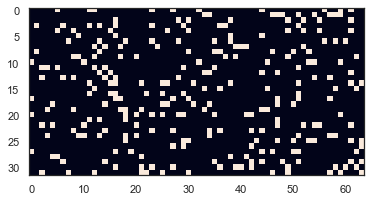

In [10]:
special_arr = dfa["fp_of_rep_A"][60]
plt.imshow(special_arr.reshape(-1, 64))
plt.show()
plt.close()

In [11]:
from rdkit import DataStructs

df_fs = (dfa[["SMILES_repeating_unitA", "fp_of_rep_A"]])
print("Length of a Fingerprint: {} \nnumber of entries: {}\nrandom code to make you smile: {}\n"
      .format(len(dfa["fp_of_rep_A"][3]),
              len(df_fs),
              (dfa["SMILES_repeating_unitA"][np.random.randint(0, len(df_fs))])))

for group, data in df_fs.groupby(["SMILES_repeating_unitA"]):
    print(group, len(data))


Length of a Fingerprint: 2048 
number of entries: 892
random code to make you smile: [N]=[P](Cl)(Cl)

[CH2][CH1](OC(=O)C) 3
[CH2][CH](C(=O)N(CC)CC) 98
[CH2][CH](C(=O)N1CCCC1) 2
[CH2][CH](C(=O)NC(C)C) 231
[CH2][CH](C(=O)NCC(OC1(C)(C))CO1) 20
[CH2][CH](C(=O)OCCCC) 1
[CH2][CH](C(=O)OCCN(C)C) 16
[CH2][CH](C(=O)OCCOCCOC) 20
[CH2][CH](C(=O)OCCOCCOCCOC) 14
[CH2][CH](C(=O)OCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOC) 2
[CH2][CH](N1C(=O)CCCCC1) 36
[CH2][CH](OC) 2
[CH2][CH](OCCOC) 21
[CH2][CH](OCCOCC) 1
[CH2][CH](OCCOCCOC) 1
[CH2][CH](OCCOCCOCC) 1
[CH2][CH](OCCOCCOCCOCCOC) 1
[CH2][CH](OCCOCCOCCOCCOCC) 1
[CH2][CH](c1ccc(COCCOCCOCCO)cc1) 10
[CH2][CH](c1ccc(COCCOCCOCCOC)cc1) 2
[CH2][CH](c1ccc(COCCOCCOCCOCCO)cc1) 12
[CH2][CH](c1ccc(COCCOCCOCCOCCOC)cc1) 3
[CH2][CH](c1ccc(COCCOCCOCCOCCOCCOC)cc1) 3
[CH2][C](C)(C(=O)N[C@@H](CC)CO) 1
[CH2][C](C)(C(=O)N[C@H](CC)CO) 2
[CH2][C](C)(C(=O)OCCOC) 2
[CH2][C](C)(C(=O)OCCOCC) 1
[CH2][C](C)(C(=O)OCCOCCOC) 70
[CH2][C](C)(C(=O)OCCOCCOCC) 2
[CH2][C](

In [12]:
#Lists and arrays do not work for pd.drop_duplicate, but tuples do or better pd.duplicated with boolean indexing
df_fs2 = df_fs[~df_fs["fp_of_rep_A"].apply(tuple).duplicated()]
df_fs3 = df_fs[~df_fs["SMILES_repeating_unitA"].apply(tuple).duplicated()]
df_fs4 = df_fs3[~df_fs3["fp_of_rep_A"].apply(tuple).duplicated()]
print("The initial Dataframe has {} Entries.\nThese are reduced to {}, or {}, or {} when excluding either duplicates of"
      " \"fp_of_rep_A\" or \"SMILES_repeating_unitA\" or both".format(
    len(df_fs),
    len(df_fs2),
    len(df_fs3),
    len(df_fs4)
))
print("This states that different at least 19 SMILES Codes (18 + amount of smiles duplicate types) can result in the"
      " same Fingerprints (only 31 instead of 49) (FPSize=2048)")


The initial Dataframe has 892 Entries.
These are reduced to 31, or 49, or 31 when excluding either duplicates of "fp_of_rep_A" or "SMILES_repeating_unitA" or both
This states that different at least 19 SMILES Codes (18 + amount of smiles duplicate types) can result in the same Fingerprints (only 31 instead of 49) (FPSize=2048)


In [13]:
def create_fp_rdkit_arr(smiles_rep_unit_a):
    return Chem.RDKFingerprint(Chem.MolFromSmiles("[H]{}[H]".format(smiles_rep_unit_a)), fpSize=2048)

S_r_A  = df_fs3["SMILES_repeating_unitA"].values.tolist()
df_fs3["fp_of_rep_A_b"] = dfa["SMILES_repeating_unitA"].apply(create_fp_rdkit_arr)
fp_r_A = df_fs3["fp_of_rep_A_b"].values.tolist()

qu, ta, sim, sim_sum = [], [], [], [0 for i in range(len(fp_r_A))]
print("df_fd3 dataframe with length {} has \n   type fp_type_A: {} \n   type fp_type_B: {} =>fp_rB".format(
    len(df_fs3), type(df_fs3["fp_of_rep_A"][0]), type(df_fs3["fp_of_rep_A_b"][0])))


df_fd3 dataframe with length 49 has 
   type fp_type_A: <class 'numpy.ndarray'> 
   type fp_type_B: <class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'> =>fp_rB


D:\ProgramData\Anaconda3\envs\ptlt\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [14]:
for i in range(len(fp_r_A)-1):
    s = DataStructs.BulkTanimotoSimilarity(fp_r_A[i], fp_r_A[i+1:])

    for n in range(len(s)):
        qu.append(S_r_A[i])
        ta.append(S_r_A[i+1:][n])
        sim.append(s[n])
        sim_sum[i] += s[n] # "similarity_sum":sim_sum

sim_df = pd.DataFrame(data={"query":qu, "target":ta, "similarity":sim, })
print(len(sim_df))
print(len(sim_sum))
sim_df


1176
49


,query,target,similarity
0,[CH2][CH](C(=O)NC(C)C),[CH2][CH](C(=O)NCC(OC1(C)(C))CO1),0.166065
1,[CH2][CH](C(=O)NC(C)C),[CH2][CH](C(=O)OCCN(C)C),0.160000
2,[CH2][CH](C(=O)NC(C)C),[CH2][C](C)(C(=O)OCCOCCOCCOCCOCCOCCOCCOCCOCC),0.088889
3,[CH2][CH](C(=O)NC(C)C),[N](C(=O)CC)C[CH2],0.771930
4,[CH2][CH](C(=O)NC(C)C),[CH2][CH](C(=O)N(CC)CC),0.505747
...,...,...,...
1171,[C](=O)C(CCCCCCOCCOCCOCCOCOOC)OC(=O)C(CCCCCCOC...,[CH2][C](C)(CC(=O)OCCOCCOCCOC),0.285714
1172,[C](=O)C(CCCCCCOCCOCCOCCOCOOC)OC(=O)C(CCCCCCOC...,[CH2][C](CC(=O)OCCOCCOCCOCCOCCOCCOCCOCCOCCOC),0.297491
1173,[CH2][C](C)(CC(=O)OCCOCCOC),[CH2][C](C)(CC(=O)OCCOCCOCCOC),1.000000
1174,[CH2][C](C)(CC(=O)OCCOCCOC),[CH2][C](CC(=O)OCCOCCOCCOCCOCCOCCOCCOCCOCCOC),0.851852


In [15]:
from ipywidgets import interact, fixed
unique_fp_dict = {}
for entry in df_fs3[["SMILES_repeating_unitA","fp_of_rep_A_b"]].to_numpy():
    #create new dict-pair from one line taking row 1 and 2 as key and value
    unique_fp_dict[entry[0]] = entry[1]

def display_fp(smiles, np_arr):
    fp_pic = plt.imshow(np.array(np_arr[smiles]).reshape(-1, 64))
    return plt.show(fp_pic)
print(unique_fp_dict)
interact(display_fp, smiles=list(unique_fp_dict.keys()), np_arr=fixed(unique_fp_dict))


{'[CH2][CH](C(=O)NC(C)C)': <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000001DB0D2F7710>, '[CH2][CH](C(=O)NCC(OC1(C)(C))CO1)': <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000001DB0D306850>, '[CH2][CH](C(=O)OCCN(C)C)': <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000001DB0D306800>, '[CH2][C](C)(C(=O)OCCOCCOCCOCCOCCOCCOCCOCCOCC)': <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000001DB0D30C3F0>, '[N](C(=O)CC)C[CH2]': <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000001DB0D30C620>, '[CH2][CH](C(=O)N(CC)CC)': <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000001DB0D303440>, '[CH2][CH](OC)': <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000001DB0D2FA490>, '[O]C[CH](C)': <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000001DB0D2FA7B0>, '[N]=[P](Cl)(Cl)': <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000001DB0D302030>, '[CH2][CH](N1C(=O)CCCCC1)': <rdkit.DataStructs.c

interactive(children=(Dropdown(description='smiles', options=('[CH2][CH](C(=O)NC(C)C)', '[CH2][CH](C(=O)NCC(OC…

<function __main__.display_fp(smiles, np_arr)>

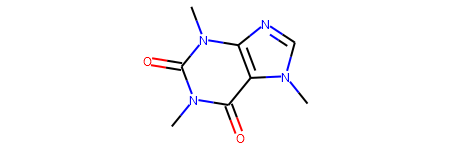

In [16]:
Caffeine = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
MolCaf = Chem.MolFromSmiles(Caffeine)
display(MolCaf)


In [17]:
'''Returns the Atom-pair fingerprint for a molecule as
  a SparseBitVect. Note that this doesn't match the standard
  definition of atom pairs, which uses counts of the
  pairs, not just their presence.
  This is very important when describing molecules with reoccurring structures'''
testsmiles = "[H][CH2][CH](C(=O)NCC(OC1(C)(C))CO1)[H]"
Atompairs = Pairs.GetAtomPairFingerprintAsBitVect(Chem.MolFromSmiles(testsmiles))
for number, i in enumerate(Atompairs):
    if i > 0:
       print(number, i)
       print(Pairs.ExplainPairScore(number))

print(len(Atompairs))


541730 1
(('C', 1, 0), 2, ('C', 1, 0))
541736 1
(('C', 1, 0), 8, ('C', 1, 0))
558113 1
(('C', 1, 0), 1, ('C', 2, 0))
558115 1
(('C', 1, 0), 3, ('C', 2, 0))
558116 1
(('C', 1, 0), 4, ('C', 2, 0))
558118 1
(('C', 1, 0), 6, ('C', 2, 0))
558119 1
(('C', 1, 0), 7, ('C', 2, 0))
558146 1
(('C', 2, 0), 2, ('C', 2, 0))
558147 1
(('C', 2, 0), 3, ('C', 2, 0))
558149 1
(('C', 2, 0), 5, ('C', 2, 0))
574499 1
(('C', 1, 0), 3, ('C', 3, 0))
574501 1
(('C', 1, 0), 5, ('C', 3, 0))
574529 1
(('C', 2, 0), 1, ('C', 3, 0))
574532 1
(('C', 2, 0), 4, ('C', 3, 0))
590881 1
(('C', 1, 0), 1, ('C', 4, 0))
590887 1
(('C', 1, 0), 7, ('C', 4, 0))
590914 1
(('C', 2, 0), 2, ('C', 4, 0))
590915 1
(('C', 2, 0), 3, ('C', 4, 0))
590918 1
(('C', 2, 0), 6, ('C', 4, 0))
590946 1
(('C', 3, 0), 2, ('C', 4, 0))
705570 1
(('C', 1, 0), 2, ('C', 3, 1))
705574 1
(('C', 1, 0), 6, ('C', 3, 1))
705601 1
(('C', 2, 0), 1, ('C', 3, 1))
705602 1
(('C', 2, 0), 2, ('C', 3, 1))
705604 1
(('C', 2, 0), 4, ('C', 3, 1))
705635 1
(('C', 3, 0), 3,

In [18]:
Atompairs_small = Pairs.GetHashedAtomPairFingerprint(Chem.MolFromSmiles(testsmiles),4048)
AP_s_Size = 0
toohighn = [0]*3
# hashed fps/'IntSparseIntVect'-objects have no length operation.
# Their size is set at construction time - manual iteration:
for i in Atompairs_small:
    AP_s_Size += 1
    if i == 1:
        toohighn[0] += 1
    if i == 2:
        toohighn[1] += 1
    if i == 3:
        toohighn[2] += 1
    if i > 3:
        toohighn.append(i)
toohighn[0]= str(toohighn[0]) + " one's"
toohighn[1]= str(toohighn[1]) + " two's"
toohighn[2]= str(toohighn[2]) + " three's"
print("FPsize is", AP_s_Size, toohighn)


FPsize is 4048 ["47 one's", "12 two's", "1 three's", 4]


In [19]:
def create_hashed_AP_fingerprint(smiles_rep_unit_a):
    #to yield an iteratable numpy array the vector must first be converted to a list.
    return np.array(list(Pairs.GetHashedAtomPairFingerprint(Chem.MolFromSmiles("[H]{}[H]".format(smiles_rep_unit_a)),1024)))

dfa["AP_fp_of_rep_A"] = dfa["SMILES_repeating_unitA"].apply(create_hashed_AP_fingerprint)
df_fs5 = dfa[["SMILES_repeating_unitA", "AP_fp_of_rep_A", "fp_of_rep_A"]]
df_fs6 = df_fs5[~df_fs5["SMILES_repeating_unitA"].apply(tuple).duplicated()]
df_fs7 = df_fs6[~df_fs6["AP_fp_of_rep_A"].apply(tuple).duplicated()]
df_fs8 = df_fs6[~df_fs6["fp_of_rep_A"].apply(tuple).duplicated()]
print("{} different smiles result in {} different Atompair fingerprints or {} different substructure fingerprints".format(len(df_fs6), len(df_fs7), len(df_fs8)))
#ap_fp and fp are not hashable for groupby function


49 different smiles result in 48 different Atompair fingerprints or 31 different substructure fingerprints


In [20]:
df_all_rep = pd.DataFrame(list(dfa["SMILES_repeating_unitA"])+list(dfa["SMILES_repeating_unitB"])+list(dfa["SMILES_repeating_unitC"]), columns=["all_rep_units"])
df_all_rep = df_all_rep.dropna().drop_duplicates().reset_index()
df_all_rep["ap_fp"] = df_all_rep["all_rep_units"].apply(create_hashed_AP_fingerprint)
df_all_rep["subs_fp"] = df_all_rep["all_rep_units"].apply(create_fingerprint)
subs_fps = len(df_all_rep[~df_all_rep["subs_fp"].apply(tuple).duplicated()])
ap_fps = len(df_all_rep[~df_all_rep["ap_fp"].apply(tuple).duplicated()])

diff_structs =len(df_all_rep)
print("originally there were {} different structures but only {} and {} different atompair- and substructure Fp have been generated".format(diff_structs, ap_fps, subs_fps))


originally there were 87 different structures but only 86 and 63 different atompair- and substructure Fp have been generated


In [21]:
S_c_clock_w_A = create_hashed_AP_fingerprint("[CH2][C](C)(C(=O)N[C@H](CC)CO)")
R_clock_w_A = create_hashed_AP_fingerprint("[CH2][C](C)(C(=O)N[C@H](CC)CO)")
S_c_clock_w_B = create_fingerprint("[CH2][C](C)(C(=O)N[C@H](CC)CO)")
R_clock_w_B = create_fingerprint("[CH2][C](C)(C(=O)N[C@@H](CC)CO)")
print((S_c_clock_w_A == R_clock_w_A).all(), (S_c_clock_w_B == R_clock_w_B).all())


True True


In [22]:
def fp_investigator(fp_arr):
    one_s = 0
    zero_s = 0
    for numb in fp_arr:
        if numb==1:
            one_s+=1
        elif numb==0:
            zero_s+=1
        else:
            print(numb)
    print(one_s, " one\'s and ", zero_s, " zero\'s with a lenght of ", len(fp_arr))


In [23]:
cyclooctan = "C1CCCCCCC1"
onethreedimethylcyclohexan = "C1(C)CC(C)CCCCC1"
methylcyclohexan = "C1(C)CCCCCCC1"

fp_investigator(create_hashed_AP_fingerprint(cyclooctan))
fp_investigator(create_hashed_AP_fingerprint(onethreedimethylcyclohexan))
fp_investigator(create_hashed_AP_fingerprint(methylcyclohexan))

8
8
4
8
0  one's and  1020  zero's with a lenght of  1024
2
2
5
4
4
4
2
2
2
4
4
4
2
2
2  one's and  1008  zero's with a lenght of  1024
2
6
2
2
6
3
2
6
2
2
3  one's and  1011  zero's with a lenght of  1024


In [24]:
for line in df_fs6["SMILES_repeating_unitA"]:
    print(line)


[CH2][CH](C(=O)NC(C)C)
[CH2][CH](C(=O)NCC(OC1(C)(C))CO1)
[CH2][CH](C(=O)OCCN(C)C)
[CH2][C](C)(C(=O)OCCOCCOCCOCCOCCOCCOCCOCCOCC)
[N](C(=O)CC)C[CH2]
[CH2][CH](C(=O)N(CC)CC)
[CH2][CH](OC)
[O]C[CH](C)
[N]=[P](Cl)(Cl)
[CH2][CH](N1C(=O)CCCCC1)
[CH2][CH1](OC(=O)C)
[CH](C)[CH](C(=O)OCCN(C)C)
[CH2][C](C)(C(=O)N[C@H](CC)CO)
[CH2][C](C)(C(=O)N[C@@H](CC)CO)
[N](C(=O)CCC)C[CH2]
[N](C(=O)C(C)C)C[CH2]
[CH2][C](C)(C(=O)[O][N](C(=O)CC)C[CH2][N](C(=O)CC)C[CH2][N](C(=O)CC)C[CH2][N](C(=O)CC)C[CH2][N](C(=O)CC)CC)
[CH2][CH](OCCOC)
[CH2][CH](OCCOCC)
[CH2][CH](OCCOCCOCC)
[CH2][CH](OCCOCCOCCOCCOCC)
[CH2][CH](OCCOCCOC)
[CH2][CH](OCCOCCOCCOCCOC)
[CH2][C](C)(C(=O)OCCOCCOC)
[CH2][C](C)(C(=O)OCCOCCOCCOC)
[CH2][C](C)(C(=O)OCCOC)
[CH2][C](C)(C(=O)OCCOCCOCCOCCOC)
[CH2][C](C)(C(=O)OCCOCC)
[CH2][C](C)(C(=O)OCCOCCOCC)
[CH2][C](C)(C(=O)OCCOCCOCCOCC)
[CH2][C](C)(C(=O)OCCOCCOCCOCCOCC)
[CH2][CH](C(=O)OCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOC)
[CH2][CH](C(=O)N1CCCC1)
[CH2][CH](C(=O)OCCCC)
[CH2][C](C)(C(=O

In [25]:
np_fp_arr1 = dfa["fp_of_rep_A"][0]
np_fp_arr2 = dfa["fp_of_rep_A"][60]
np_fp_arr3 = dfa["fp_of_rep_A"][80]
np_fp_set = (np_fp_arr1, np_fp_arr2, np_fp_arr3)

def merge_subs_fp2(*fingerprints): #takes in a number of numpy substructure fps as list and merges to one containing all substructures
    complement_fp = np.zeros(len(fingerprints[1]))
    for pos, bit in enumerate(np.array(fingerprints).T):
        if 1 in bit:
            complement_fp[pos] = 1
    return complement_fp # returns np.array

In [26]:
#leave out subduct because it makes no difference on sub_pf and makes no sense for deleting in ap_fp as single bits represent multiple pairs
def subduct_subs_fp(*fingerprints):
    whet = fingerprints[0]
    fingerprint_s = []
    for fp in fingerprints[1:]:
        current_s_fp = fp
        for pos, whetstone in enumerate(whet):
            if whetstone == 0:
                if current_s_fp[pos] != 0:
                    print(current_s_fp[pos], " deleted")
                current_s_fp[pos] = 0
        fingerprint_s.append(current_s_fp)
    return fingerprint_s
subduct_subs_fp(np.array([0,1,0,0,0,1,1]), list([1,1,0,1,0,1,0]), [0,1,1,1,1,1,1])

1  deleted
1  deleted
1  deleted
1  deleted
1  deleted


[[0, 1, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 1, 1]]

In [27]:
def create_subs_fp (*smiless, complement=False, fpSize=2048): #takes in a number of complemented, or middle-piece smiles codes and FP-size and returns np.array
    if complement:
        smlist = [("[H]{}[H]".format(smiles)) for smiles in smiless]
    else: smlist = smiless

    fingerprint_s = [np.array(Chem.RDKFingerprint(Chem.MolFromSmiles(smiles), fpSize=fpSize)) for smiles in smlist]
    return fingerprint_s #returns a list

def create_hashed_ap_fp(*smiless, complement=False, fpSize=2048):
    if complement:
        smlist = [("[H]{}[H]".format(smiles)) for smiles in smiless]
    else: smlist = smiless

    fingerprint_s = []
    for smiles in smlist:
        #to yield an iterable numpy array the vector must first be converted to a list.
        fingerprint_s.append(np.array(list(Pairs.GetHashedAtomPairFingerprint(Chem.MolFromSmiles(smiles), fpSize))))
#        np.array(list(Pairs.GetHashedAtomPairFingerprint(Chem.MolFromSmiles("[H]{}[H]".format(smiles_rep_unit_a)),1024)))
    return fingerprint_s #returns a list

def create_ap_fp(*smiless, complement=False):
    if complement:
        smlist = [("[H]{}[H]".format(smiles)) for smiles in smiless]
    else: smlist = smiless

    fingerprint_s = []
    for smiles in smlist:
        #to yield an iterable numpy array the vector must first be converted to a list.
        fingerprint_s.append(np.array(list(Pairs.GetAtomPairFingerprint(Chem.MolFromSmiles(smiles)))))
    return fingerprint_s #returns a list


In [28]:
import itertools
def combinations(*smiles_frags, start, end): #takes in a number of smiles fragments. Returns a list of possible representations
    combination_fps = []
    for mutation in (itertools.permutations(smiles_frags, len(smiles_frags))):
        combination_fps.append(start + "".join(mutation) + end)

    return combination_fps


In [29]:
def concatenator(args): #concatenates arrays in a list
    if not type(args) in (list, tuple):
        raise Exception("List, Tuple, or other sequence expected but got {}!".format(type(args)))
    return np.concatenate(args, axis=0) # returns array
    # np.concatenate((np.zeros(3), np.zeros(4))) works
    # np.concatenate(np.zeros(3), np.zeros(4)) does NOT work, bec sequence is needed

print(concatenator(create_subs_fp("[CH2][CH](C(=O)NC(C)C)", complement=True) + create_hashed_ap_fp("[CH2][CH](C(=O)NC(C)(C)C)", complement=True)))


[0 0 0 ... 0 0 0]


In [30]:
# the Entry 878 of the Excel-sheet serves as a good representative
EXAMPLE_SET_K = {
    "start" : "[C](C)(C#N)(CC(C)C)",
    "end" : "[C](C)(C#N)(CC(C)C)"}
EXAMPLE_SET = {
    0.56 : "[CH2][CH](C(=O)NC(C)C)",
    0.44 : "[CH2][CH](C(=O)NC(C)(C)C)"
    }
MOL_WEIGHT = 7500
for i in combinations(*EXAMPLE_SET.values(), **EXAMPLE_SET_K):
    print((create_subs_fp(i, fpSize=2048)))


[array([1, 0, 0, ..., 0, 0, 1])]
[array([1, 0, 0, ..., 0, 0, 1])]


In [31]:
def significance_sigma(fp_rep_arrays, incidence): # takes in a list of fp_arrays, a list with respective abundance
    sigma = np.zeros(len(fp_rep_arrays[0]))
    for fp_arr, inci in zip(fp_rep_arrays, incidence):
        sigma_part = np.array(fp_arr)*inci
        sigma += sigma_part
    return [sigma]


In [32]:
# for mass and
def calc_ends_share(ends, rep_units, total_weight): # calculates the molfraction of the polymer end groups
    total_moles_minus = 0
    print(ends.values())
    total_weight_minus = total_weight - sum(Descriptors.MolWt(Chem.MolFromSmiles(x)) for x in ends.values())
    for rep_w, chie in zip(rep_units.values(), rep_units.keys()):
        rep_m = total_weight_minus*chie
        rep_n = rep_m/Descriptors.MolWt(Chem.MolFromSmiles(rep_w))
        total_moles_minus += rep_n
    start_end_chie=1/total_moles_minus
    return start_end_chie
TestEndShare = calc_ends_share(EXAMPLE_SET_K, EXAMPLE_SET, MOL_WEIGHT)
TestApfpends = significance_sigma(fp_rep_arrays=create_hashed_ap_fp(*list(EXAMPLE_SET_K.values())), incidence=2*[TestEndShare])
print(TestApfpends)
Testsubfpends = significance_sigma(fp_rep_arrays=create_subs_fp(*list(EXAMPLE_SET_K.values())), incidence=2*[TestEndShare])
print(Testsubfpends)


dict_values(['[C](C)(C#N)(CC(C)C)', '[C](C)(C#N)(CC(C)C)'])
[array([0., 0., 0., ..., 0., 0., 0.])]
[array([0., 0., 0., ..., 0., 0., 0.])]


In [33]:
import random
def random_polymer_smiles():
    howmany_ges = MOL_WEIGHT/np.array([Descriptors.MolWt(Chem.MolFromSmiles(smiles)) * abu for abu, smiles in EXAMPLE_SET.items()]).sum()
    howmany = [int(howmany_ges*abundance) for abundance in EXAMPLE_SET.keys()]
    middlesmiles = sum([[sm]*mag for sm, mag in zip(EXAMPLE_SET.values(), howmany)], [])
    random.shuffle(middlesmiles)
    whole_smiles = (EXAMPLE_SET_K["start"] + "".join(middlesmiles) + EXAMPLE_SET_K["end"])
    return whole_smiles
random_polymer_smiles()

'[C](C)(C#N)(CC(C)C)[CH2][CH](C(=O)NC(C)(C)C)[CH2][CH](C(=O)NC(C)(C)C)[CH2][CH](C(=O)NC(C)C)[CH2][CH](C(=O)NC(C)C)[CH2][CH](C(=O)NC(C)(C)C)[CH2][CH](C(=O)NC(C)(C)C)[CH2][CH](C(=O)NC(C)C)[CH2][CH](C(=O)NC(C)C)[CH2][CH](C(=O)NC(C)C)[CH2][CH](C(=O)NC(C)C)[CH2][CH](C(=O)NC(C)(C)C)[CH2][CH](C(=O)NC(C)(C)C)[CH2][CH](C(=O)NC(C)(C)C)[CH2][CH](C(=O)NC(C)(C)C)[CH2][CH](C(=O)NC(C)(C)C)[CH2][CH](C(=O)NC(C)C)[CH2][CH](C(=O)NC(C)C)[CH2][CH](C(=O)NC(C)C)[CH2][CH](C(=O)NC(C)C)[CH2][CH](C(=O)NC(C)(C)C)[CH2][CH](C(=O)NC(C)C)[CH2][CH](C(=O)NC(C)C)[CH2][CH](C(=O)NC(C)C)[CH2][CH](C(=O)NC(C)C)[CH2][CH](C(=O)NC(C)(C)C)[CH2][CH](C(=O)NC(C)C)[CH2][CH](C(=O)NC(C)C)[CH2][CH](C(=O)NC(C)C)[CH2][CH](C(=O)NC(C)(C)C)[CH2][CH](C(=O)NC(C)(C)C)[CH2][CH](C(=O)NC(C)(C)C)[CH2][CH](C(=O)NC(C)(C)C)[CH2][CH](C(=O)NC(C)(C)C)[CH2][CH](C(=O)NC(C)(C)C)[CH2][CH](C(=O)NC(C)C)[CH2][CH](C(=O)NC(C)C)[CH2][CH](C(=O)NC(C)C)[CH2][CH](C(=O)NC(C)C)[CH2][CH](C(=O)NC(C)(C)C)[CH2][CH](C(=O)NC(C)C)[CH2][CH](C(=O)NC(C)C)[CH2][CH](C(=O)NC(C)C)[C

In [34]:
# How much faster is it to calculate only the rep units in a conceive manner instead of the whole polymer
from datetime import datetime
# FP reducer, looks for indifferences in whole subset and creates a sparse FP without them. The found conformation must
    #       be somehow stored and applicable onto new introduced smiles, even if information gets lost, so the nn always
    #       gets the same amount of data and only trains on reasonable information.
''' seconds with 1000 rep
(*.1 Subssturcture FP
*.2 Atom pair FP
*.3 Substructure concat Atom pair)

1. single rep unit ~ 1.1; 1.2; 1.3 (3, 1 and 4 seconds) (needs to be doubled)
2. representation: All possible combinations start, end, rep units; merged to one ~ 2.1 (14 secs with two possibilities)
3. all single rep units, multiplied with occurrence and united to one, likewise with start,end units ~ 3.1; 3.2; 3.3
    subs which do not occure in overall 2.1 are substracted from single here to exclude [H- endgroups however the seems
     to be no change at all, meaning no H are considered by the subs fp as for the ap fp (44, 4 ,48 seconds reduced to
      11, 4, 15 seconds without subduction)
4. generation of smiles code for whole molecule ~ 4.1; 4.2; 4.3 (31, 2:34, 5:02 seconds)

only with rep units fp gen is -> 11 to 31, 4 to 154 and 15 to 302 -> is 2,8; 38,5; 20,13 so overall ~20 times faster and
grants the possibility to be calculated more dynamic instead of bipolar bits ones n zeros!

a combination of 2.1 and 3.3 without subduction should do the trick (ca. 29 milliseconds per molecule (two rep units)
'''
# to measure the time with more accuracy the functions are executed multiple times
EXEC_TIMES = 1
def rotator(func, *args):
    for _ in range(EXEC_TIMES):
        var = func(*args)
    return print(type(var)), print(var), print(len(var)), print("_"*100)

print("{} times each computation".format(EXEC_TIMES))
next_timeframe = [datetime.now()]

print("# 1.1")
rotator(lambda: np.array(*create_subs_fp("[CH2][CH](C(=O)NC(C)(C)C)", complement=True)))
next_timeframe.append(datetime.now())

print("# 1.2")
rotator(lambda: np.array(*create_hashed_ap_fp("[CH2][CH](C(=O)NC(C)(C)C)", complement=True)))
next_timeframe.append(datetime.now())

print("# 1.3")
rotator(lambda: concatenator(create_subs_fp("[CH2][CH](C(=O)NC(C)(C)C)", complement=True) +
                              create_hashed_ap_fp("[CH2][CH](C(=O)NC(C)(C)C)", complement=True)))
next_timeframe.append(datetime.now())

print("# 2.1")
rotator(lambda: merge_subs_fp2(*create_subs_fp(*(combinations(*(EXAMPLE_SET.values()), **EXAMPLE_SET_K)))))
next_timeframe.append(datetime.now())

print("# 3.1 start/end gets concatinated so the nn learns it's importance") # subducter proved unnecessary (the fp /
              # creating methods ignore missing bonds/create no additional information from of truncated SMILES-Codes)
# rotator(lambda: concatenator(
#     significance_sigma(fp_rep_arrays=subduct_subs_fp(*(merge_subs_fp2(*create_subs_fp(*(combinations(*(EXAMPLE_SET.values()),
#                         **EXAMPLE_SET_K)))), *create_subs_fp(*list(EXAMPLE_SET_K.values())))),
#                        incidence=2*[TestEndShare])
#     +
#     significance_sigma(
#             fp_rep_arrays=subduct_subs_fp(*(merge_subs_fp2(*create_subs_fp(*(combinations(*(EXAMPLE_SET.values()),
#                         **EXAMPLE_SET_K)))), *create_subs_fp(*EXAMPLE_SET.values()))),
#             incidence=list(EXAMPLE_SET.keys()))))
rotator(lambda: concatenator(
    significance_sigma(fp_rep_arrays=create_subs_fp(*list(EXAMPLE_SET_K.values())),
                       incidence=2*[TestEndShare])
    +
    significance_sigma(
            fp_rep_arrays=create_subs_fp(*EXAMPLE_SET.values()),
            incidence=list(EXAMPLE_SET.keys()))))
next_timeframe.append(datetime.now())

print("#3.2")
rotator(lambda: concatenator(
        significance_sigma(fp_rep_arrays=create_hashed_ap_fp(*list(EXAMPLE_SET_K.values())),
                       incidence=2*[TestEndShare])
    +
    significance_sigma(
            fp_rep_arrays= create_hashed_ap_fp(*EXAMPLE_SET.values()),
            incidence=list(EXAMPLE_SET.keys()))
))
next_timeframe.append(datetime.now())

print("#3.3")
rotator(lambda: concatenator([concatenator(
    significance_sigma(fp_rep_arrays=create_subs_fp(*list(EXAMPLE_SET_K.values())),
                       incidence=2*[TestEndShare])
    +
    significance_sigma(
            fp_rep_arrays= create_subs_fp(*EXAMPLE_SET.values()),
            incidence=list(EXAMPLE_SET.keys()))
)
                             , concatenator(
        significance_sigma(fp_rep_arrays=create_hashed_ap_fp(*list(EXAMPLE_SET_K.values())),
                       incidence=2*[TestEndShare])
    +
    significance_sigma(
            fp_rep_arrays= create_hashed_ap_fp(*EXAMPLE_SET.values()),
            incidence=list(EXAMPLE_SET.keys()))
)]
                             ))
next_timeframe.append(datetime.now())

print("# 4.1")
rotator(lambda: np.array(*create_subs_fp(random_polymer_smiles())))
next_timeframe.append(datetime.now())

print("# 4.2")
rotator(lambda: np.array(*(create_hashed_ap_fp(random_polymer_smiles()))))
next_timeframe.append(datetime.now())

print("# 4.3")
rotator(lambda: concatenator((create_hashed_ap_fp(random_polymer_smiles())) + (create_hashed_ap_fp(random_polymer_smiles()))))
next_timeframe.append(datetime.now())

def time_to_readable (elapsed_time):
    e_mins, e_secs = divmod(elapsed_time.total_seconds(), 60)
    e_hours, e_mins = divmod(e_mins, 60)
    return e_hours, e_mins, e_secs

elapsed_times = []
for i in range(len(next_timeframe)):
    if i == (len(next_timeframe)-1):
        break
    elapsed_times.append(next_timeframe[i+1] - next_timeframe[i])

for elapsedTime in elapsed_times:
    print("this took {:.0f} hours, {:.0f} minutes and {:.0f} seconds".format(*time_to_readable(elapsedTime)))


1 times each computation
# 1.1
<class 'numpy.ndarray'>
[0 0 0 ... 0 0 1]
2048
____________________________________________________________________________________________________
# 1.2
<class 'numpy.ndarray'>
[0 0 0 ... 0 0 0]
2048
____________________________________________________________________________________________________
# 1.3
<class 'numpy.ndarray'>
[0 0 0 ... 0 0 0]
4096
____________________________________________________________________________________________________
# 2.1
<class 'numpy.ndarray'>
[1. 0. 0. ... 0. 0. 1.]
2048
____________________________________________________________________________________________________
# 3.1 start/end gets concatinated so the nn learns it's importance
<class 'numpy.ndarray'>
[0. 0. 0. ... 0. 0. 1.]
4096
____________________________________________________________________________________________________
#3.2
<class 'numpy.ndarray'>
[0. 0. 0. ... 0. 0. 0.]
4096
__________________________________________________________________________

In [35]:
fp_investigator(*create_hashed_ap_fp("[CH2]CC[CH2]", complement=False))
fp_investigator(merge_subs_fp2(*create_subs_fp(*(combinations(*(EXAMPLE_SET.values()), **EXAMPLE_SET_K)))))
fp_investigator(merge_subs_fp2(*create_hashed_ap_fp(*list(EXAMPLE_SET_K.values()))))


2
2
2  one's and  2044  zero's with a lenght of  2048
374  one's and  1674  zero's with a lenght of  2048
8  one's and  2040  zero's with a lenght of  2048


In [36]:
arr1, arr2, arr3 = np.array([0, 0, 0.7, 1, 2]),\
                   np.array([1, 0, 0.7, 1, 2]),\
                   np.array([2, 0, 0.7, 0, 2])

def reduce_fp_set(*fingerprints): #takes in a number of arrays compares them and gives back the arrays without the positions which never change.
    all_fps = np.concatenate(fingerprints)
    all_fps = all_fps.reshape(len(fingerprints) ,-1)
    first = all_fps[0]
    mask = np.all(all_fps == first, axis=0)
    all_fps = all_fps.transpose()
    reduced_fp = list(all_fps[~mask].transpose())
    print("reduced size by {0:.0f}%".format((1-(len(reduced_fp[0])/len(first)))*100))
    return reduced_fp, mask, first

def reduce_fp(*fingerprint, mask, first): #takes in a number of arrays and mask and subtracts.
    reduced_fp = [new_fp[~mask] for new_fp in fingerprint]
    bit_loss = len([new_fp2[~(mask & (new_fp2 == first))] for new_fp2 in fingerprint][0]) # "&" is bitwise; "and" is logically true (exists?, is not zero) https://www.geeksforgeeks.org/difference-between-and-and-in-python/

    loss = 1-(len(reduced_fp[0])/bit_loss)
    return reduced_fp, loss

new_arr = np.array([0, 0, 0.7, 0, 2]) # when passed a new array this could be used to determine the amount of substructures ignored.
new_arr2 =np.array([2, 1, 0.8, 1, 3])

reduced_fp, maske, first = reduce_fp_set(arr1, arr2, arr3)
print(reduced_fp, "\n", maske, "\n", first)
reduced_new_fp, loss = reduce_fp(new_arr, mask=maske, first=first)
print(reduced_new_fp, "\n", "%s loss in \"used\" bits" % (loss))
reduced_new_fp, loss = reduce_fp(new_arr2, mask=maske, first=first)
print(reduced_new_fp, "\n", "%s loss in \"used\" bits" % (loss))


reduced size by 60%
[array([0., 1.]), array([1., 1.]), array([2., 0.])] 
 [False  True  True False  True] 
 [0.  0.  0.7 1.  2. ]
[array([0., 0.])] 
 0.0 loss in "used" bits
[array([2., 1.])] 
 0.6 loss in "used" bits


In [37]:
from math import isnan
def pH_counter():
    count_dictu = {}
    for x in df["pH"]:
        if isnan(x):
            continue
        if x in count_dictu:
            count_dictu[x] += 1
        else:
            count_dictu[x] = 1
    print(count_dictu)

print("{8.46: 12, 8.31: 4, 7.4: 7, 1.2: 3, 7.0: 8, 4.0: 11}")
df["pH"] = [7 if isnan(x) else x for x in df["pH"]]
pH_counter()


{8.46: 12, 8.31: 4, 7.4: 7, 1.2: 3, 7.0: 8, 4.0: 11}
{7.0: 849, 8.46: 12, 8.31: 4, 7.4: 8, 1.2: 3, 4.0: 12, 5.0: 1, 5.5: 1, 6.5: 1, 6.0: 1}


In [38]:
# handles (NH4)2 as two, H2PO4 and HPO4 as the same and H and OH as nothing
Salt_Dic = {
    "NaCl" : ["Na", "Cl"],
    "NaN3" : ["Na", "N3"],
    "LiCl" : ["Li", "Cl"],
    "CsCl" : ["Cs", "Cl"],
    "RbCl" : ["Rb", "Cl"],
    "KCl" : ["K", "Cl"],
    "KI" : ["K", "I"],
    "KBr" : ["K", "Br"],
    "KF" : ["K", "F"],
    "KOH" : ["K"],
    "KSFO4" : ["K", "SFO4"],
    "LiOH" : ["Li"],
    "CsOH" : ["Cs"],
    "RbOH" : ["Rb"],
    "NaOH" : ["Na"],
    "(NH4)2SO4" : ["NH4", "NH4", "Cl"],
    "TBAAc" : ["TBA", "Ac"],
    "SDS" : ["Na", "dodecylsulfat"],
    "Na2HPO4" : ["Na", "Na", "H2PO4"],
    "HCl" : ["Cl"],
    "KH2PO4" : ["K", "H2PO4"],
    "K2SO4" : ["K", "K", "SO4"],
    "Na2SO4" : ["Na", "Na", "SO4"],
    "Li2SO4" : ["Li", "Li", "SO4"],
    "NaOAc" : ["Na", "OAc"],
    "LiOAc" : ["Li", "OAc"],
    "LiClO4" : ["Li", "ClO4"],
    "LiI" : ["Li", "I"],
    "NaI" : ["Na", "I"],
    "NaClO4" : ["Na", "ClO4"],
    "NaSCN" : ["Na", "SCN"],
    "hexasodium calix[6]arenehexasulfonic acid" : ["Na", "Na", "Na", "Na", "Na", "Na", "calix6"],
}
# salt concentration effect
def salt_setter(salt_cols, salt_conc):
    for column in salt_cols:
        for salt in column:
            if not salt in Salt_Dic.keys():
                Salt_Dic[salt] = [salt]
                print("added {}".format(salt))
    del Salt_Dic[np.nan]
    ion_types = []
    for ions in Salt_Dic.values():
        for ion in ions:
            ion_types.append(ion) if ion not in ion_types else None
    print("{} types now and before {}".format(len(ion_types), len(Salt_Dic)))
    # print(ion_types)
    new_col_as_arr = []
    for columns in zip(*salt_cols, *salt_conc):
        temp_arr = np.zeros(len(ion_types))

        if not isinstance(columns[0], type(np.nan)):
            temp_ions = Salt_Dic[columns[0]]
            for ion in temp_ions:
                temp_arr[ion_types.index(ion)] += columns[2]

        if not (type(columns[1]))==type(np.nan):
            temp_ions = Salt_Dic[columns[1]]
            for ion in temp_ions:
                temp_arr[ion_types.index(ion)] += columns[3]
        new_col_as_arr.append(temp_arr[1:])
    return new_col_as_arr

salts_cols = df["additive1"], df["additive2"]
salts_conc_cols = df["additive1_concentration_molar"], df["additive2_concentration_molar"]

df["salts"] = salt_setter(salt_cols=salts_cols, salt_conc=salts_conc_cols)
df["salts"][61]


added nan
added glycine
added CH4O4S
added C4H10O4S
added C5H12O4S
added C6H14O4S
added C8H18O4S
added C9H20O4S
added C10H22O4S
added C12H26O4S
added C4H8O4S
added L-Trp
added D-Trp
added α-cyclodextrin
added 2,6‐di‐O‐methyl‐β‐cyclodextrin
35 types now and before 46


array([0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  ])

In [39]:
def def_decision(def_type):
    if type(def_type) == type(0.1):
        aqu_point = str(def_type)
    else:
        aqu_point = def_type.replace("DSC", "0.01").replace("A", "0.1").replace("B", "0.2").replace("C", "0.5").replace(",",".")
    return float(aqu_point)
df["aqu_point"] = [def_decision(x) for x in df["def_type"]]

(df.groupby("aqu_point") ["reference"].nunique()).reset_index()


,aqu_point,reference
0,0.01,2
1,0.05,1
2,0.10,17
3,0.20,3
4,0.50,13


In [40]:
molis_df = df[["SMILES_start_group", "SMILES_end_group",
          "SMILES_repeating_unitA", "SMILES_repeating_unitB",
          "SMILES_repeating_unitC", "SMILES_repeating_unitD"]].drop_duplicates().reset_index()
cols = molis_df.columns.tolist()
cols = [cols[1]] + cols[3:] + [cols[2]] # D is empty anyway
molis_df = molis_df[cols]
# iloc gives out a series of the portion of the df expressed by location row_start:row_end , col_start, col_end]

# all combined does the following create a series of all entries\
# dropping every empty rep unit argument and concatenating it to a string before creating the mol datatype of rdkit
all_polys_smiles = np.array([molis_df.iloc[n].dropna().str.cat() for n in molis_df.index])
all_polys_pics = np.array([Chem.MolFromSmiles(molis_df.iloc[n].dropna().str.cat()) for n in molis_df.index])
all_polys = np.vstack((all_polys_smiles, all_polys_pics)).T
# all_polys = np.reshape(a=all_polys, newshape=(-1, 2))

def draw_my_mols (polys_list):
    mol_names = []
    mol_structs = []
    for i in polys_list:
        if len(i[0]) > 70:
            # mol_names.append("\n".join(i[0][p:p+60] for p in range(0, len(i[0]), 60)))
            # legends do not support line breaks
            mol_names.append(i[0][0:65] + "...")
        else:
            mol_names.append(i[0])
        mol_structs.append(i[1])
    return Draw.MolsToGridImage(
        mol_structs, molsPerRow=3, maxMols=10, subImgSize=(600, 600), legends=mol_names)

# draw_my_mols(all_polys).save(os.path.join(base_path,"structures.png"), "PNG")
# draw_my_mols(all_polys) # show some here


In [41]:
def split_list (liste, splitsize = 4):
    partlist = []
    for i in range(0, len(liste), splitsize):
        # print(i)
        partlist.append(all_polys[i:i+splitsize])
    return partlist
print("These will result in " + str(len(split_list(all_polys, 3))) + " files.")

These will result in 41 files.


In [42]:
os.makedirs(os.path.join(base_path, "single_struct_pics"), exist_ok=True)


In [43]:
def mol_to_svg(mol, size=(50, 50), svg_data=None):
    if svg_data is None:
        svg_data = {}

    structure_graphic = rdMolDraw2D.MolDraw2DSVG(*size)
    # structure_graphic.SetFontSize(2)
    # Chem.Draw.MolDraw2D.SetFontSize(structure_graphic, 22)
    rdMolDraw2D.PrepareAndDrawMolecule(structure_graphic, mol, **svg_data)
    structure_graphic.FinishDrawing()
    return SVG(structure_graphic.GetDrawingText())

large_polys_nr = [23, 87, 88, 115, 116 ,120, 71, 74, 19, 23, 30]  # molecules which are just way too large
large_polys = [i-1 for i in large_polys_nr]

for i in range(0, len(all_polys), 1):
    p = all_polys[i][1]
    poly_S = all_polys[i][0]

    p_rel_size = (len(poly_S)*9, len(poly_S)*9)
    if i in large_polys:  # These
        p_rel_size = (len(poly_S)*16, len(poly_S)*16)
    # display(mol_to_svg(test_p, size=test_p_size))
    with open(os.path.join(base_path, "single_struct_pics", "structure{}.svg".format(i+1)), "w")as f:
        f.write(mol_to_svg(p, size=p_rel_size).data)
        

In [44]:
with open(os.path.join(base_path, "single_struct_pics", "SMILES.txt"), "w") as file:
    file.write("\n".join([all_polys[i][0] for i in range(len(all_polys))]))
